In [1]:
%matplotlib inline

import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

from IPython.display import display
from IPython.core.display import HTML

# Fancy token-level analysis such as stemming, lemmatizing, compound splitting, filtering based on part-of-speech, etc.
# are not included in the scikit-learn codebase, but can be added by customizing either the tokenizer or the analyzer.
# Here’s a CountVectorizer with a tokenizer and lemmatizer using NLTK:

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    
# Use: vect = CountVectorizer(tokenizer=LemmaTokenizer())

In [15]:
urlgtr = 'http://gtr.rcuk.ac.uk/gtr/api/projects?q='

li = ["AH/M00953X/1",
"AH/L503563/1",
"AH/N006445/1",
"AH/L012545/1",
"AH/J008109/1",
"AH/P013139/1",
"AH/L009870/1",
"AH/M002403/1",
"AH/L007657/1",
"AH/L007584/1",
"AH/J013145/1",
"AH/R004641/1",
"AH/J012955/1",
"AH/J012696/1",
"AH/J012718/1",
"AH/L010208/1",
"AH/L010283/1",
"AH/M010120/1",
"AH/M002225/1",
"AH/M002616/1",
"AH/J013129/1",
"AH/M010279/1",
"AH/L010313/1",
"AH/M010163/1",
"AH/L009986/1",
"AH/L007886/1",
"AH/J013153/1",
"AH/L01002X/1",
"AH/J013072/1",
"AH/M010368/1",
"AH/L009854/1",
"AH/L009978/1",
"AH/L007916/1",
"AH/J013048/1",
"AH/R004803/1",
"AH/L010062/1",
"AH/M002551/1",
"AH/M010015/1",
"AH/L010011/1",
"AH/M010589/1",
"AH/L008025/1",
"AH/J012408/1",
"AH/J012769/1",
"AH/M002233/1",
"AH/M010414/1",
"AH/R004854/1",
"AH/M010392/1",
"AH/L010364/1",
"AH/M00452X/1",
"AH/M010481/1",
"AH/L010305/1",
"AH/M010155/1",
"AH/L010186/1",
"AH/J012890/1",
"AH/L010046/1",
"AH/L007533/1",
"AH/L009927/1",
"AH/M002454/1",
"AH/L01016X/1",
"AH/L007770/1",
"AH/J012483/1",
"AH/M002322/1",
"AH/L503575/1",
"AH/L009986/2",
"AH/N009568/1",
"AH/P009549/1",
"AH/R004846/1",
"AH/J006963/1",
"AH/M005666/1",
"AH/R00157X/1",
"AH/M005658/1",
"AH/L503605/1",
"AH/J013242/1",
"AH/L010232/1",
"AH/L007800/1",
"AH/J013056/1",
"AH/M00564X/1",
"AH/M010201/1",
"AH/J01236X/1",
"AH/N50449X/1",
"AH/L006863/1",
"AH/M002438/1",
"AH/J01317X/1",
"AH/J01303X/1",
"AH/M010031/1",
"AH/J013218/1",
"AH/M002535/1",
"AH/L007991/1",
"AH/L009935/1",
"AH/L010380/1",
"AH/L010194/1",
"AH/R004757/1",
"AH/L007746/1",
"AH/M002160/1",
"AH/L00688X/1",
"AH/L007576/1",
"AH/L00982X/1",
"AH/L006820/1",
"AH/P00945X/1",
"AH/P005918/1",
"AH/P013287/1",
"AH/M005623/1",]

headers = {'Accept': 'application/vnd.rcuk.gtr.json-v7'}

cols = ['Reference', 'Title', 'Abstract', "R_topics"]
df = pd.DataFrame(columns=cols, index=range(len(li)))

In [5]:
counter = 0
for project in li:
    url = (urlgtr + '"' + project + '"' + "&f=pro.gr")
    response = requests.get(url, headers=headers)
    proginfo = json.loads(response.text)["project"]
    df.iloc[counter][0] = project
    df.iloc[counter][1] = proginfo[0]["title"]
    df.iloc[counter][2] = proginfo[0]["abstractText"]
    topic = []
    for i in range (0, len(proginfo[0]["researchTopics"]["researchTopic"])):
        text = proginfo[0]["researchTopics"]["researchTopic"][i]["text"]
        topic.append(text)
        df.iloc[counter][3] = topic
    counter += 1

In [5]:
# Replace '\r\n' resulting from the SPARQL query, due to some serialisation issues
# table_led["exp"] = table_led["exp"].str.replace('\r\n', ' ')

In [6]:
#table_led.sort_values(by="year", inplace=True)
df.head(20)

,Reference,Title,Abstract,R_topics
0,AH/M00953X/1,Building sustainability and informing policy: ...,This Follow-on project will build on the succe...,"[Information & Knowledge Mgmt, Science-Based A..."
1,AH/L503563/1,Mapping Mapusa Market,Mapping Mapusa Market is an exploration into h...,[Unclassified]
2,AH/N006445/1,The Human Side of Digitized Knowledge: Communi...,The Ethno-ornithology World Archive (EWA) is a...,"[Linguistics (General), Environment, Cultural ..."
3,AH/L012545/1,Latin(o) American Digital Art: Exhibitions and...,This project follows on from my AHRC Fellowshi...,"[Cultural Studies & Pop Culture, Multimedia, D..."
4,AH/J008109/1,"Latin American Cultural Production Online, fro...",This project explores one of the most innovati...,"[Cultural Studies & Pop Culture, Digital Arts ..."
5,AH/P013139/1,Ian Rankin StoryTrek: New Digital Storytelling...,The project has two main aims: (1) to develop ...,[English Language & Literature]
6,AH/L009870/1,Optical Music Recognition from Multiple Sources,Digital images of scores are now available in ...,"[Musicology, Classical Music, Image & Vision C..."
7,AH/M002403/1,Weaving Codes - Coding Weaves,In this project we investigate pattern from mu...,"[Digital Arts HTP, Performance & Live Art, Cul..."
8,AH/L007657/1,Crowd- and Community-fuelled Archaeological Re...,This project will not only use 'crowd-sourcing...,"[Social Stats., Comp. & Methods, Prehistoric A..."
9,AH/L007584/1,EWA - The Ethno-ornithology World Archive,"Birds inspire people, their cultures and faith...","[Linguistics (General), Cultural and Anthrop G..."


In [9]:
df.shape

(102, 4)

In [12]:
# Search for words within the dataset (example).
df[df["Abstract"].str.contains("music")]

,Reference,Title,Abstract,R_topics
6,AH/L009870/1,Optical Music Recognition from Multiple Sources,Digital images of scores are now available in ...,"[Musicology, Classical Music, Image & Vision C..."
7,AH/M002403/1,Weaving Codes - Coding Weaves,In this project we investigate pattern from mu...,"[Digital Arts HTP, Performance & Live Art, Cul..."
10,AH/J013145/1,Measuring and Enhancing Expressive Musical Per...,This collaborative project between members of ...,"[Human-Computer Interactions, Music & Acoustic..."
17,AH/M010120/1,Networking technology and the experience of en...,Could networking technology transform ensemble...,"[Musical Performance, ICT and education, Class..."
21,AH/M010279/1,Breakdown Harmonica,Breakdown Harmonica is a research project focu...,"[Dance Performance, Design Processes, Dance No..."
23,AH/M010163/1,Pet Sounds: Creating Music using Social Media ...,The proposed project seeks to explore the ways...,"[Musicology, Musical Performance, Music & Soci..."
29,AH/M010368/1,Transforming Transformation: 3D Models for Int...,'Transforming Transformation: 3D Models for In...,"[Music & Acoustic Technology, Image & Vision C..."
34,AH/R004803/1,Unlocking Musicology: Digital Engagement for D...,'Unlocking Musicology: Digital Engagement for ...,"[Music & Acoustic Technology, History Of Music..."
41,AH/J012408/1,Computer-Human Interactive Performance Symposi...,"Popular music (e.g. folk, rock, music theatre)...","[Artificial Intelligence, Software Engineering..."
51,AH/M010155/1,Classical Music 'Hyper-Production' and Practic...,The world of instrumental classical music is c...,"[New Media/Web-Based Studies, Music & Acoustic..."


## Topic modelling with scikit-learn

In [9]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction import text

n_samples = len(df)

# Number of terms included in the bag of words matrix
n_features = 10000

# Number of components (i.e. topics)
n_topics = 8

documents = df["Abstract"]
n_top_words = 15

my_words = set("research".split(" "))
stop_words = text.ENGLISH_STOP_WORDS.union(my_words)

In [10]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
#        print("Topic: " + str(topic_idx))
#        print(" ".join([feature_names[i]
        display(HTML("<b>Topic " + str(topic_idx) + "</b>"))
        display(HTML("<i>" +  " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]) + "</i>"))

In [11]:
# Common English words (stop_words), words occurring in only ten document (min_df=10)
# or in at least 95% of the documents (max_df=0.9) are removed; catch 1-grams and 2-grams (ngram_range=(1,2))

# Use tf-idf features for Non-Negative Matrix Factorization (NMF).

print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(token_pattern='\\b[a-zA-Z]\\w\\w+\\b', max_df=0.9, min_df=10,
                                   ngram_range=(1,2), stop_words=stop_words)

t0 = time()
tfidf = tfidf_vectorizer.fit_transform(documents)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(token_pattern='\\b[a-zA-Z]\\w\\w+\\b', max_df=0.9, min_df=10,
                                ngram_range=(1,2), stop_words=stop_words)

t0 = time()
tf = tf_vectorizer.fit_transform(documents)
print("done in %0.3fs." % (time() - t0))
print()


# Fit the NMF model (Frobenius norm)
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, init="nndsvd", random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
display_topics(nmf, tfidf_feature_names, n_top_words)
print()

# Fit the NMF model (generalised Kullback-Leibler divergence)
print("Fitting the NMF model (generalised Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))
print()

print("\nTopics in NMF model (generalised Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
display_topics(nmf, tfidf_feature_names, n_top_words)
print()

# Fit the LDA model
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
display_topics(lda, tf_feature_names, n_top_words)

Extracting tf-idf features for NMF...
done in 0.119s.
Extracting tf features for LDA...
done in 0.113s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=102 and n_features=10000...
done in 0.026s.

Topics in NMF model (Frobenius norm):



Fitting the NMF model (generalised Kullback-Leibler divergence) with tf-idf features, n_samples=102 and n_features=10000...
done in 0.257s.


Topics in NMF model (generalised Kullback-Leibler divergence):



Fitting LDA models with tf features, n_samples=102 and n_features=10000...
done in 0.775s.

Topics in LDA model:


## Getting the top documents' ID for each topic

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np

def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        display(HTML("<b>Topic %d: </b>" % (topic_idx)))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort(W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            link = ("<p><a href='https://gtr.ukri.org/projects?ref=" + df.Reference[doc_index] + "'>" + df.Title[doc_index] + "</a></p>")
            display(HTML(link))
        
documents = df["Abstract"]
            
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), token_pattern='\\b[a-zA-Z]\\w\\w+\\b', max_df=0.95, min_df=2, stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(ngram_range=(1,2), token_pattern='\\b[a-zA-Z]\\w\\w+\\b', max_df=0.95, min_df=2, stop_words=stop_words)
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 8

# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

no_top_words = 10
no_top_documents = 4
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)
#display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

digital project community new communities heritage design archive social cultural


music musical performance audio musicology digital music symbolic musicians ensemble listener


data big big data legislation quot datasets open data bsd cultural open


film film media essay audiovisual media video symposium essays digital audiovisual essay


edinburgh literary palimpsest city literature rankin literary texts cityscape literary cityscape fiction


prison prison industries design inmates industries employment makeright design thinking thinking ahmedabad


noise cities delhi india unbox building urban device city raise


visualisations data visualisations data big data big reception migobs consumers migration effectiveness


## Publications

In [66]:
# Generates a df_id only for the projects IDs with title

cols = ['Title', "ID"]
df_id = pd.DataFrame(columns=cols, index=range(len(li)))

counter = 0
for project in li:
    url = (urlgtr + '"' + project + '"' + "&f=pro.gr")
    response = requests.get(url, headers=headers)
    proginfo = json.loads(response.text)["project"]
    df_id.iloc[counter][0] = proginfo[0]["title"]
    df_id.iloc[counter][1] = proginfo[0]["id"]
    counter += 1

In [94]:
# Generates a dataframe with publications and associated projects

cols = ["ID", "Publication", "Type", "Autor", "Link"]
df_publications = pd.DataFrame(columns=cols, index=range(2000))

counter = 0
count = 0
for idx, project_id in enumerate(df_id["ID"]):
    requestURL = 'https://gtr.ukri.org/gtr/api/projects/' + project_id + '/outcomes/publications'
    b_response = requests.get(requestURL, headers=headers)
    pubinfo = json.loads(b_response.text)
    
    for pub in pubinfo["publication"]:
        df_publications.iloc[counter][0] = df_id["Title"][idx]
        df_publications.iloc[counter][1] = pub["title"]
        df_publications.iloc[counter][2] = pub["type"]
        df_publications.iloc[counter][3] = pub["author"]

        try:
            df_publications.iloc[counter][4] = pub["datePublished"]
        except KeyError:
            count += 1
            df_publications.iloc[counter][4] = ""
    
    #for pub in pubinfo["publication"]:

        #df_publications.iloc[0] = project_id
        #df_publications.iloc[1] = pub["title"]
        counter += 1

In [95]:
df_publications.dropna(inplace=True)

In [96]:
df_publications.set_index("ID", inplace=True)

In [97]:
df_publications

,Publication,Type,Autor,Link
ID,,,,
Building sustainability and informing policy: The MicroPasts programme of knowledge exchange,Digital Co-production in Archaeology. An edito...,Journal Article/Review,Bonacchi C,1483228800000
Building sustainability and informing policy: The MicroPasts programme of knowledge exchange,Experiments in Crowd-funding Community Archaeo...,Journal Article/Review,Bonacchi C,1420070400000
Building sustainability and informing policy: The MicroPasts programme of knowledge exchange,Crowd- and community-fuelled archaeology. Earl...,Conference/Paper/Proceeding/Abstract,"Bonacchi, C",1420070400000
Building sustainability and informing policy: The MicroPasts programme of knowledge exchange,(Submitted) Evaluating Participants and Partic...,Journal Article/Review,"Bonacchi, C.",
Building sustainability and informing policy: The MicroPasts programme of knowledge exchange,Crowd-sourcing the British Bronze Age: Initial...,Conference/Paper/Proceeding/Abstract,"Wilkin,N.",1420070400000
Building sustainability and informing policy: The MicroPasts programme of knowledge exchange,Online Research Collaborations beyond the Academy,Systematic review,Chiara Bonacchi,1514764800000
The Human Side of Digitized Knowledge: Community Curation of the Ethno-ornithology World Archive,Ethno-ornithology of the Mushere of Nigeria: C...,Journal Article/Review,Pam G B,
The Human Side of Digitized Knowledge: Community Curation of the Ethno-ornithology World Archive,&quot;Listen Carefully to the Voices of the Bi...,Journal Article/Review,Wyndham F S,
The Human Side of Digitized Knowledge: Community Curation of the Ethno-ornithology World Archive,Inter-governmental Platform on Biodiversity &a...,Book Chapter,Wyndham F S,


In [76]:
df_publications[df_publications["Publication"].str.contains("romance")]

,Publication,Type,Autor,Link
ID,,,,
Visualising European Crime Fiction: New Digital Tools and Approaches to the Study of Transnational Popular Culture,&lt;&lt; O romance e leitores populares (1830-...,Journal Article/Review,Loïc Artiaga,https://gtr.ukri.org:443/gtr/api/outcomes/publ...


In [64]:
df_publications.to_csv("pub.csv", sep="§")

In [43]:
cols = ["ID", "Reference", "Publication"]
publications_df = pd.DataFrame(columns=cols, index=range(727))

counter = 0
for project in li:
    url = (urlgtr + '"' + project + '"' + "&f=pro.gr")
    response = requests.get(url, headers=headers)
    proginfo = json.loads(response.text)["project"]
    publication = []
    for i in range (0, len(proginfo[0]["links"]["link"])):
        if proginfo[0]["links"]["link"][i]["rel"] == "PUBLICATION":
            publications_df.iloc[counter][0] = proginfo[0]["id"]
            publications_df.iloc[counter][1] = project
            publications_df.iloc[counter][2] = proginfo[0]["links"]["link"][i]["href"]
            counter += 1

In [44]:
#publications_df.dropna()
publications_df

,ID,Reference,Publication
0,BF3B84D7-4CBD-4A7E-A9DA-88098267C998,AH/M00953X/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
1,BF3B84D7-4CBD-4A7E-A9DA-88098267C998,AH/M00953X/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
2,BF3B84D7-4CBD-4A7E-A9DA-88098267C998,AH/M00953X/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
3,BF3B84D7-4CBD-4A7E-A9DA-88098267C998,AH/M00953X/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
4,BF3B84D7-4CBD-4A7E-A9DA-88098267C998,AH/M00953X/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
5,BF3B84D7-4CBD-4A7E-A9DA-88098267C998,AH/M00953X/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
6,26905938-5538-42DA-B039-1286285CD78B,AH/N006445/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
7,26905938-5538-42DA-B039-1286285CD78B,AH/N006445/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
8,26905938-5538-42DA-B039-1286285CD78B,AH/N006445/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...
9,26905938-5538-42DA-B039-1286285CD78B,AH/N006445/1,https://gtr.ukri.org:443/gtr/api/outcomes/publ...


## Research topics as per gtruk classification

In [15]:
cols = ["Reference", "R_topics"]
r_topics_df = pd.DataFrame(columns=cols, index=range(392))

counter = 0
for project in li:
    url = (urlgtr + '"' + project + '"' + "&f=pro.gr")
    response = requests.get(url, headers=headers)
    proginfo = json.loads(response.text)["project"]
    topic = []
    for i in range (0, len(proginfo[0]["researchTopics"]["researchTopic"])):
        r_topics_df.iloc[counter][0] = project
        r_topics_df.iloc[counter][1] = proginfo[0]["researchTopics"]["researchTopic"][i]["text"]
        counter += 1

In [16]:
# Drop the NaN
# r_topics_df.dropna()
r_topics_df.head(20)

,Reference,R_topics
0,AH/M00953X/1,Heritage Management
1,AH/M00953X/1,Information & Knowledge Mgmt
2,AH/M00953X/1,Science-Based Archaeology
3,AH/L503563/1,Unclassified
4,AH/N006445/1,Linguistics (General)
5,AH/N006445/1,Cultural and Anthrop Geography
6,AH/N006445/1,Environment
7,AH/N006445/1,Cultural Studies
8,AH/N006445/1,Conservation Ecology
9,AH/L012545/1,Cultural Studies & Pop Culture


Information & Knowledge Mgmt      21
New Media/Web-Based Studies       17
Digital Arts HTP                  13
Human-Computer Interactions       12
Cultural History                  11
Multimedia                        10
Musicology                         9
Archives                           9
Heritage Management                9
English Language & Literature      9
Economic & Social History          9
Digital Art & Design               9
Music & Acoustic Technology        9
Design Processes                   8
Musical Performance                8
Computer Graphics & Visual.        7
Cultural Studies & Pop Culture     7
Classical Music                    6
Media & Communication Studies      6
Education                          6
Popular Music                      5
Film-based media (H, T & P)        5
Community Art inc A & H            5
Unclassified                       5
Technology and method dev          5
Film History, T & C                4
Design HTP                         4
S

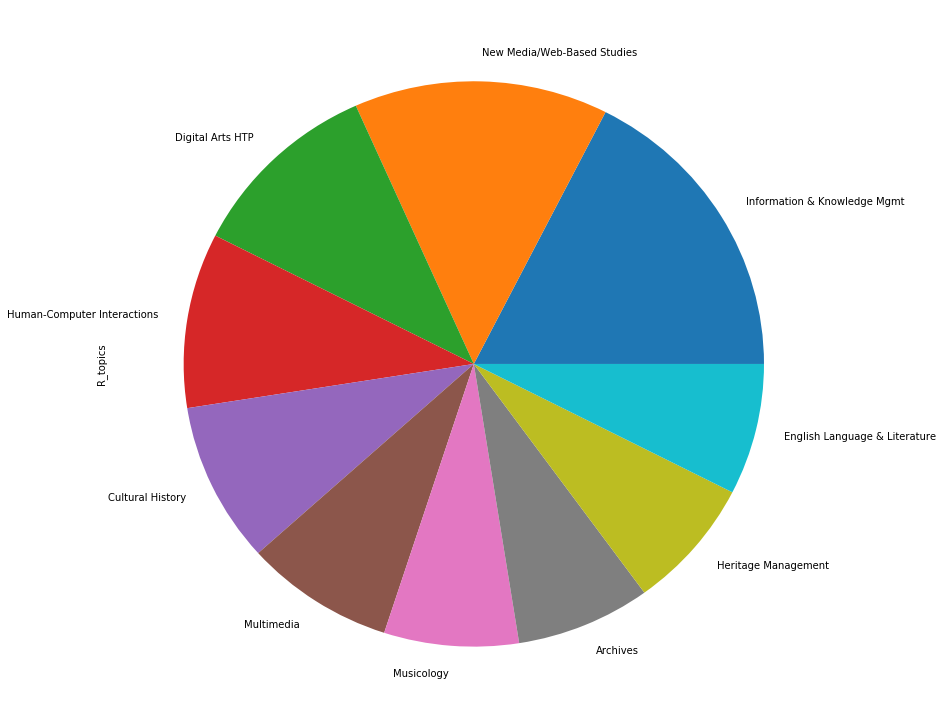

In [17]:
# Count how many research topics per unique project:

exp_pl = r_topics_df["R_topics"].value_counts()

print(exp_pl)

ser_pl = pd.Series(data=(exp_pl))

ser_pl.head(10).plot.pie(figsize=(13, 13));

## A nice visualisation for the topics found

In [18]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

ModuleNotFoundError: No module named 'pyLDAvis'

In [ ]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                ngram_range=(1,2), stop_words = stop_words,
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.9, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(documents)
print(dtm_tf.shape)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(documents)
print(dtm_tfidf.shape)

In [ ]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=18, random_state=0, learning_method='batch')
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=18, random_state=0, learning_method='batch')
lda_tfidf.fit(dtm_tfidf)

In [ ]:
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')

# λ controls the weight of the frequency of that word compared to that specific topic/overall text.
# λ = 0 -> Maximum weight on the estimated term frequency within the selected topic
# λ = 1 -> Maximum weight to the overall term frequency